In [ ]:
!which python

In [ ]:
!!pip install pandas numpy scikit-learn matplotlib seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

# 1. Data Exploration


In [2]:
# Load the dataset
url = "https://www.kaggle.com/datasets/ethancratchley/email-phishing-dataset/data"
data = pd.read_csv('email_phishing_data.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


We will see if data has missing values, if there are, we will drop the records.

In [3]:
# Check for null values
null_values = data.isnull().sum()
print("Missing Values in Each Column:\n", null_values)

#null2 = sum(data.isnull().values.any(axis=1))
#print(null2)

Missing Values in Each Column:
 num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64


# 2. Dimension Reduction

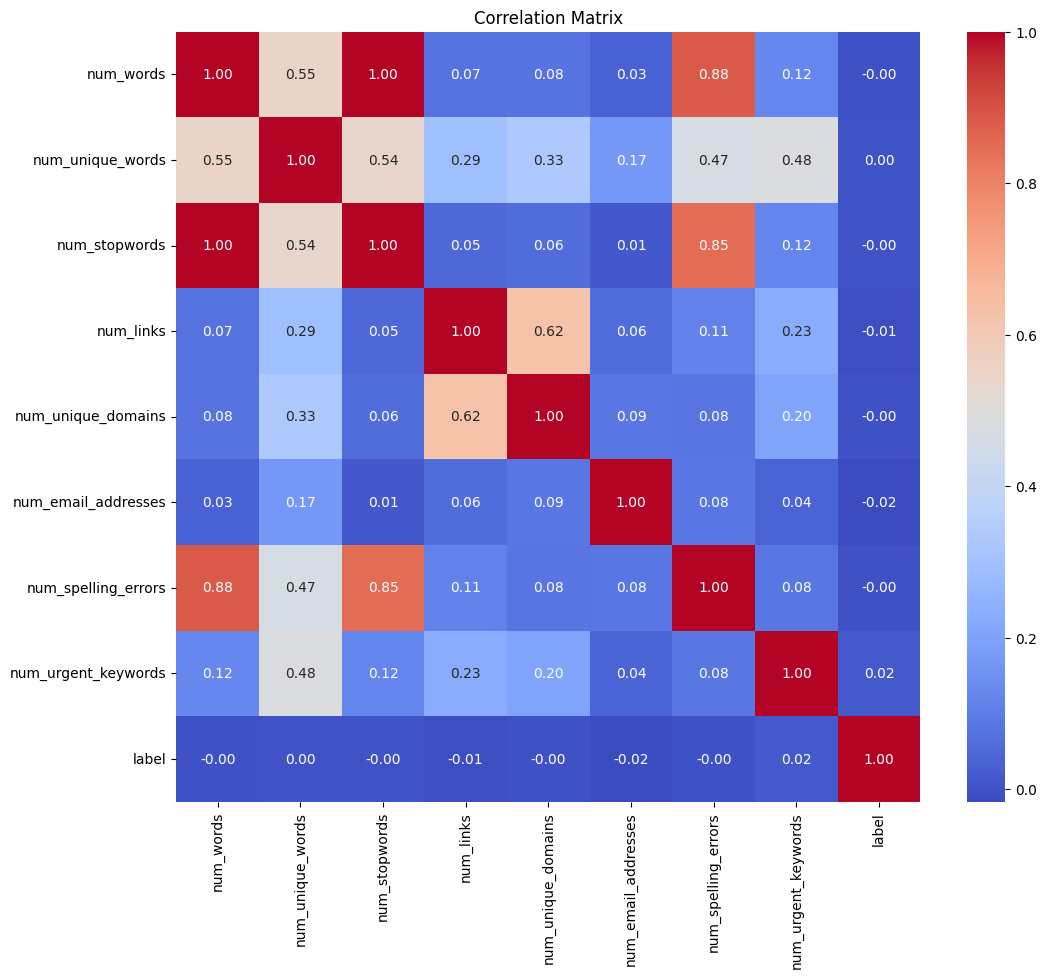

In [4]:
corr_matrix = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Since there is a strong correlation of num_words and num_stopwords with each other (correlation=1) and low with the label, we will drop either one of these. In this case, we will drop num_words. Similarly, num_spelling_errors has high correlation with the previous two and it will also be dropped.

This dimension reduction will help improve slight performance.


In [5]:
data = data.drop(['num_words', 'num_spelling_errors'], axis=1)

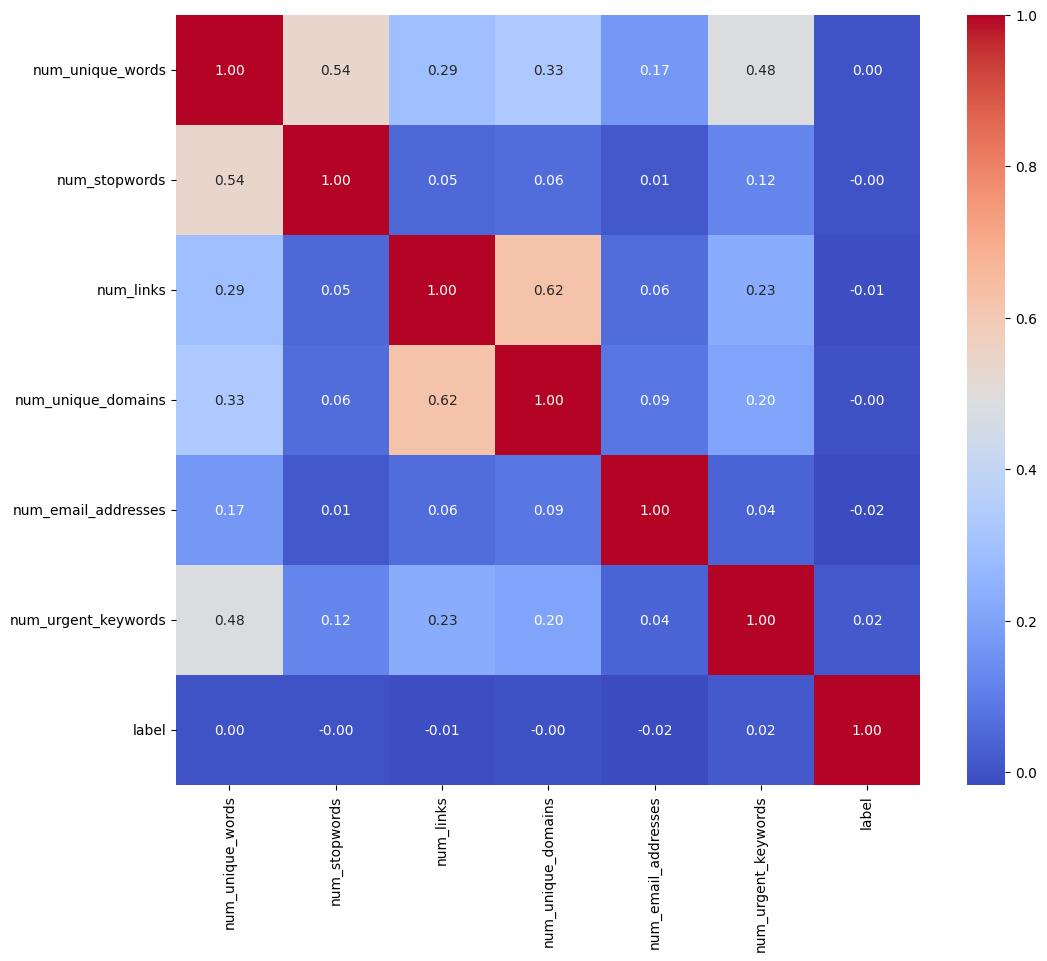

In [6]:
# New Correlation Matrix
corr_matrix2 = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# 3. Sampling

First we will check if Phishing vs. Non-Phishing cases are equal or balanced in the dataset.


/var/folders/nm/y2bprdnn1d7_4l2tfj0b2vfw0000gp/T/ipykernel_4291/4035317745.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['label']).plot.bar()


label
0    517897
1      6949
Name: count, dtype: int64

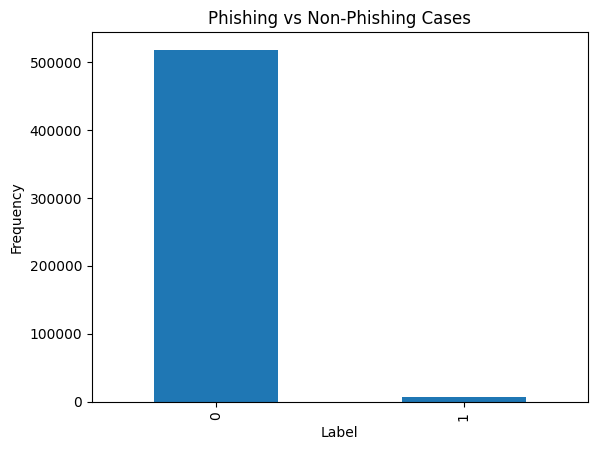

In [7]:
pd.value_counts(data['label']).plot.bar()
plt.title('Phishing vs Non-Phishing Cases')
plt.xlabel('Label')
plt.ylabel('Frequency')

data['label'].value_counts()

Since it is not balanced, we will perform some **down sampling** and make the Phishing and Non-Phishing data equal for training and testing.

In [8]:
phishing = data[data["label"] == 1]
non_phishing = data[data["label"] == 0]

num_phishing = len(phishing)
not_phishing_sampled = resample(non_phishing, replace=False, n_samples=num_phishing, random_state=30)
sampled_data = pd.concat([phishing, not_phishing_sampled])

print(sampled_data["label"].value_counts())


label
1    6949
0    6949
Name: count, dtype: int64


# 4. Classification

In [9]:
X = sampled_data.drop(['label'], axis=1)

y = sampled_data["label"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=30, 
                                                    shuffle=True,
                                                    stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (9728, 6)
Testing set shape: (4170, 6)


### A: Decision Tree Classifier

In [11]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=30, max_depth=15)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("The accuracy for the model is {:.2f}%".format(accuracy*100))

The accuracy for the model is 69.59%


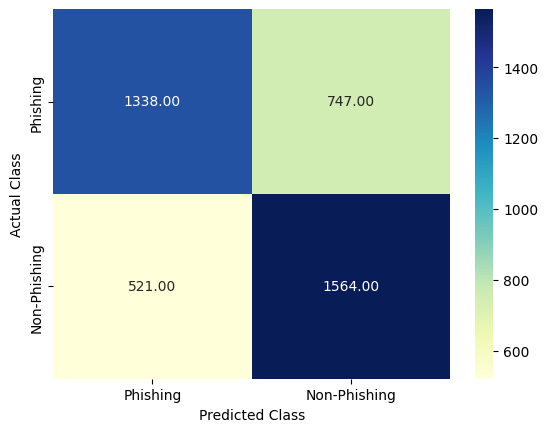

In [12]:
cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Phishing', 'Non-Phishing']
sns.heatmap(cf_matrix, xticklabels = labels, yticklabels = labels, annot=True, fmt=".2f", cmap='YlGnBu')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.show()

### B: Random Tree Classifier

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=150, criterion="entropy", random_state=30, )
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the model is {:.2f}%".format(accuracy*100))

The accuracy for the model is 71.63%


Text(50.72222222222221, 0.5, 'Actual Class')

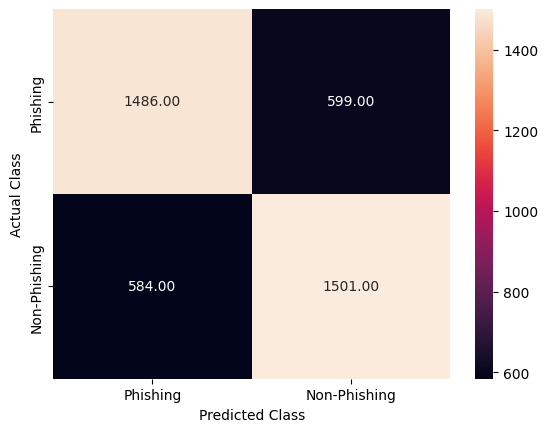

In [14]:
cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Phishing', 'Non-Phishing']
sns.heatmap(cf_matrix, xticklabels = labels, yticklabels = labels, annot=True, fmt=".2f")
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

### C: Navie Bayes Classifier

In [15]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

y_pred = gnb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the model is {:.2f}%".format(accuracy*100))

The accuracy for the model is 55.20%


The observed is accuracy is very low. The data might be skewed. We will check the skewness and apply appropriate transformation.

In [16]:
skweness = X_train.select_dtypes(include=['int64', 'float64']).skew()
print(skweness)

num_unique_words        7.230932
num_stopwords          14.740089
num_links              17.525991
num_unique_domains     26.127974
num_email_addresses    37.622585
num_urgent_keywords     2.687386
dtype: float64


The data is extremely right skewed so we will do a log transformation.

In [17]:
X_train_scaled = X_train.apply(lambda x: np.log1p(x))
X_test_scaled = X_test.apply(lambda x: np.log1p(x))

In [18]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_scaled, y_train)

y_pred = gnb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the model is {:.2f}%".format(accuracy*100))

The accuracy for the model is 62.35%


We note a seven percent increase in accuracy.

Text(50.72222222222221, 0.5, 'Actual Class')

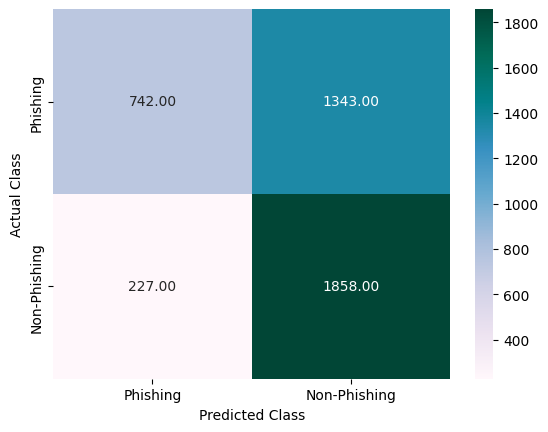

In [19]:
cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Phishing', 'Non-Phishing']
sns.heatmap(cf_matrix, xticklabels = labels, yticklabels = labels, annot=True, fmt=".2f", cmap = "PuBuGn")
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

### D: Logistic Regression

In [20]:
lr_classifier = LogisticRegression(random_state=30)
lr_classifier.fit(X_train, y_train)

y_pred = lr_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the model is {:.2f}%".format(accuracy*100))

The accuracy for the model is 65.95%


/Users/maryam/Desktop/Personal/Email-Phishing Detection/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.72222222222221, 0.5, 'Actual Class')

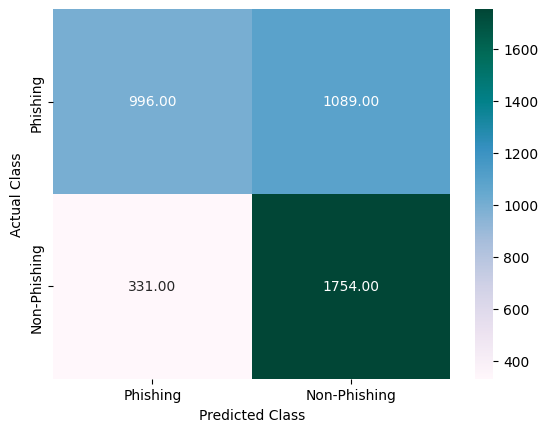

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Phishing', 'Non-Phishing']
sns.heatmap(cf_matrix, xticklabels = labels, yticklabels = labels, annot=True, fmt=".2f", cmap = "PuBuGn")
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

## 5. Summary

In this project, I analyzed an email phishing dataset to build classification models that distinguish between phishing and legitimate emails. I followed a comprehensive data science workflow that included exploration, preprocessing, model training, and evaluation.

### 1. Data Exploration
- Loaded the email phishing dataset
- Examined dataset structure and checked for missing values

### 2. Dimension Reduction
- Created correlation matrices to identify relationships between features
- Dropped highly correlated features (`num_words` and `num_spelling_errors`) to reduce dimensionality and improve model performance

### 3. Sampling
- Identified class imbalance between phishing and non-phishing emails
- Performed downsampling on the majority class (non-phishing) to create a balanced dataset

### 4. Model Training and Evaluation
I implemented four different classification algorithms:

1. **Decision Tree Classifier**
   - Used entropy criterion with max depth of 15
   - Achieved good classification accuracy

2. **Random Forest Classifier**
   - Implemented with 150 estimators and entropy criterion
   - Achieved the highest accuracy among all models

3. **Naive Bayes Classifier**
   - Initially had low accuracy
   - Applied log transformation to handle skewed data
   - Improved accuracy by approximately 7%

4. **Logistic Regression**
   - Implemented with default parameters
   - Achieved good classification performance

### 5. Performance Visualization
- Created confusion matrices for each model
- Used heatmaps for visual evaluation of model performance

## Performance Results

The Random Forest Classifier appears to have performed best, followed by the Decision Tree. The Naive Bayes classifier initially performed poorly but improved significantly after log transformation of the features.

## Key Achievements

1. Successfully addressed data imbalance through sampling techniques
2. Identified and handled feature correlations to improve model performance
3. Applied appropriate transformations to handle skewed data
4. Compared multiple classification algorithms to find the best performer
5. Visualized results effectively using confusion matrices